In [1]:
import numpy as np
import hmc
import hmc_v2# as hmc
#import hmc_v3 as hmc
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)*100
inv_cov = np.linalg.inv(cov)


In [3]:
# def mock_posterior_and_gradient(p):
#     logP = -0.5 * np.sum(p**2)
#     logP_jacobian = p * (-1)
#     #mock_posterior_and_gradient.counter += 1
#     return logP, logP_jacobian

In [4]:
def mock_posterior_and_gradient(p):
    dlogL_dCl = - inv_cov @ p
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * p.T @ dlogL_dCl
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, dlogL_dCl

In [5]:
def run_hmc(n_it, filebase, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    filename = f'{filebase}.{rank}.txt'
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    # continue
    #for i in range(n_it):
        # Save chain
        #chain = np.array(sampler.trace)
        #np.savetxt(filename, chain)

        # next round of samples
        #sampler.sample(n_it)
    
    #chain = np.array(sampler.paths)
    #anti_chain = np.array(sampler.anti_paths)
    
    #tr = np.array(sampler.trace)
    #np.savetxt(filename, chain)
    return sampler

In [6]:
start = time.time()
nit = 1000
print(np.sqrt(cov))
chain = run_hmc(nit, "hmc_002_500", 0.02, hmc, 200, cov)
print("%.2f" %(time.time()-start))
start = time.time()
chain2 = run_hmc(nit, "hmc_002_500", 0.02, hmc_v2, 0, cov)
print("%.2f" %(time.time()-start))

<ipython-input-6-9215a118b5d0>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))


[[0.98161986 1.02847469        nan]
 [1.02847469 1.43779846        nan]
 [       nan        nan 1.18201154]]
Accept 0 alpha=1.00  p=0.54  ΔH=0.000
Accept 10 alpha=1.00  p=0.78  ΔH=0.000
Accept 20 alpha=1.00  p=0.47  ΔH=0.000
Accept 30 alpha=1.00  p=0.34  ΔH=-0.000
Accept 40 alpha=1.00  p=0.17  ΔH=-0.000
Accept 50 alpha=1.00  p=0.51  ΔH=-0.000
Accept 60 alpha=1.00  p=0.19  ΔH=-0.000
Accept 70 alpha=1.00  p=0.46  ΔH=0.000
Accept 80 alpha=1.00  p=0.83  ΔH=-0.000
Accept 90 alpha=1.00  p=0.33  ΔH=-0.000
Accept 100 alpha=1.00  p=0.92  ΔH=-0.000
Accept 110 alpha=1.00  p=0.38  ΔH=0.000
Accept 120 alpha=1.00  p=0.37  ΔH=0.000
Accept 130 alpha=1.00  p=0.44  ΔH=0.000
Accept 140 alpha=1.00  p=0.53  ΔH=0.000
Accept 150 alpha=1.00  p=0.13  ΔH=-0.000
Accept 160 alpha=1.00  p=0.05  ΔH=-0.000
Accept 170 alpha=1.00  p=0.19  ΔH=-0.000
Accept 180 alpha=1.00  p=0.33  ΔH=-0.000
Accept 190 alpha=1.00  p=0.87  ΔH=-0.000
Accept 200 alpha=1.00  p=0.71  ΔH=-0.000
Accept 210 alpha=1.00  p=0.45  ΔH=-0.000
Accept 2

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)
trace = np.array(chain.trace)
trace2 = np.array(chain2.trace)

calls = np.array(chain.ncall_list)
calls2 = np.array(chain2.ncall_list)

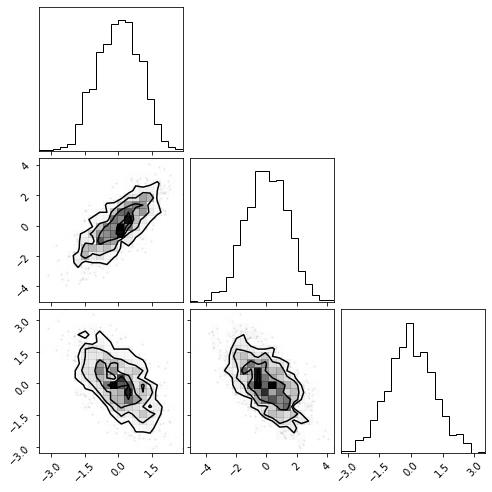

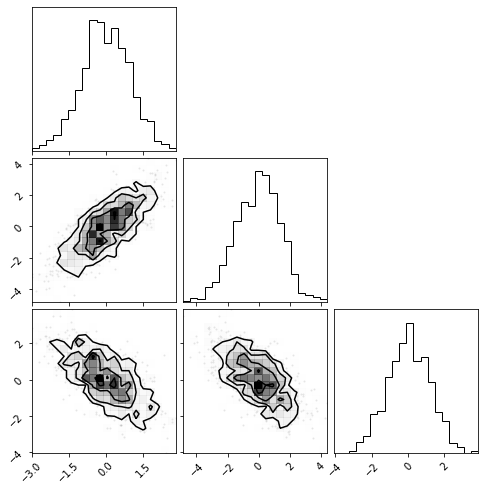

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

#plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [13]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    plt.ylim(botlim,toplim)
    
    print(np.std(trace[:,dim]))
    

<ipython-input-14-93b47e9ea3d1>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-pac

[[0.98161986 1.02847469        nan]
 [1.02847469 1.43779846        nan]
 [       nan        nan 1.18201154]]
1.1101519290221973
1.1754467896159317


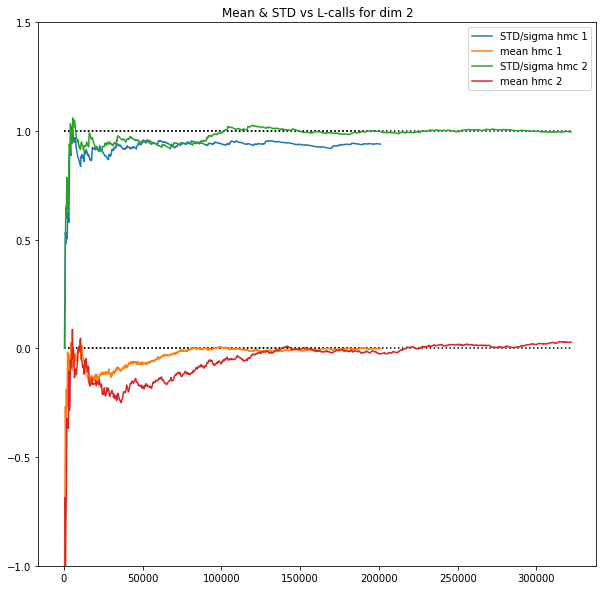

In [14]:
print(np.sqrt(cov))

plot_conv(trace,2,-1,1.5,1, cov, calls)
plot_conv(trace2,2,-1,1.5,2, cov, calls2)
plt.show()